# UCCD2063 Assignment

To obtain the same output as shown in the written report, kindly place the mushroom.csv in the same dirctory as the notebook, and run all cells one by one from the beginning or run all at once.

## SECTION 1 Data Exploration
In this section, we will explore the dataset, take notes of our findings and visualize our data.

In [1]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
#load the Mushroom data set
mushroom = pd.read_csv('mushroom.csv')

In [3]:
#setting display options to display full tables
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Display the first 5 values
mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
2,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
3,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
4,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE


In [4]:
#get the description of data, check for null values
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8416 non-null   object
 1   cap-surface               8416 non-null   object
 2   cap-color                 8416 non-null   object
 3   bruises                   8416 non-null   object
 4   odor                      8416 non-null   object
 5   gill-attachment           8416 non-null   object
 6   gill-spacing              8416 non-null   object
 7   gill-size                 8416 non-null   object
 8   gill-color                8416 non-null   object
 9   stalk-shape               8416 non-null   object
 10  stalk-root                8416 non-null   object
 11  stalk-surface-above-ring  8416 non-null   object
 12  stalk-surface-below-ring  8416 non-null   object
 13  stalk-color-above-ring    8416 non-null   object
 14  stalk-color-below-ring  

In [5]:
#show the summary of the attributes
mushroom.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7,2
top,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS,EDIBLE
freq,3796,3268,2320,5040,3808,8200,6824,5880,1728,4864,3800,5316,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160,4488


In [6]:
#display value counts details for all attributes
for cols in mushroom.columns:
    print('\n\n--------------', cols, '--------------')
    print(mushroom[cols].value_counts())



-------------- cap-shape --------------
CONVEX     3796
FLAT       3292
KNOBBED     840
BELL        452
SUNKEN       32
CONICAL       4
Name: cap-shape, dtype: int64


-------------- cap-surface --------------
SCALY      3268
SMOOTH     2684
FIBROUS    2460
GROOVES       4
Name: cap-surface, dtype: int64


-------------- cap-color --------------
BROWN       2320
GRAY        2096
RED         1500
YELLOW      1072
WHITE       1040
BUFF         168
PINK         144
CINNAMON      44
PURPLE        16
GREEN         16
Name: cap-color, dtype: int64


-------------- bruises --------------
NO         5040
BRUISES    3376
Name: bruises, dtype: int64


-------------- odor --------------
NONE        3808
FOUL        2160
SPICY        576
FISHY        576
ALMOND       400
ANISE        400
PUNGENT      256
CREOSOTE     192
MUSTY         48
Name: odor, dtype: int64


-------------- gill-attachment --------------
FREE        8200
ATTACHED     216
Name: gill-attachment, dtype: int64


-------------- 

Obesrvations:

1. "?" actually refers to missing values
2. value of "veil-type" is same for all rows

C:\Users\Alisa\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


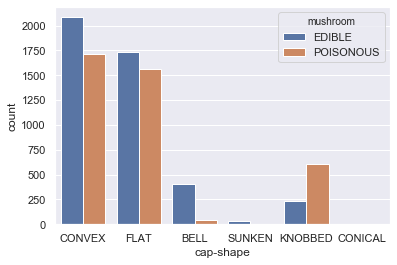

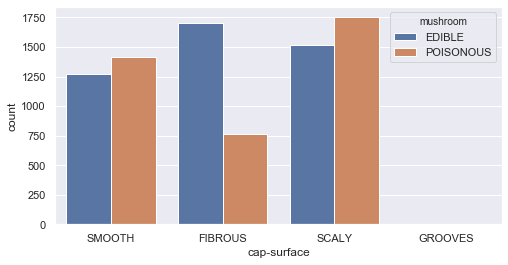

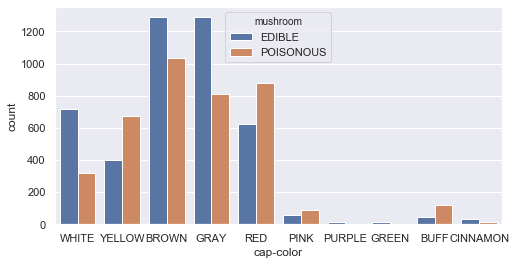

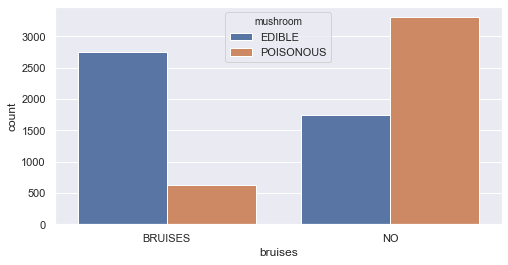

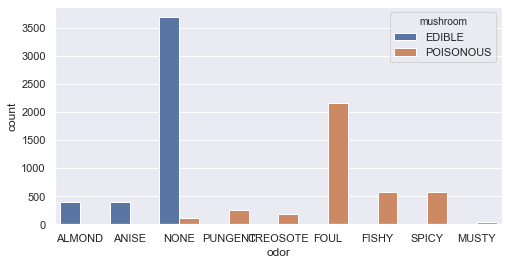

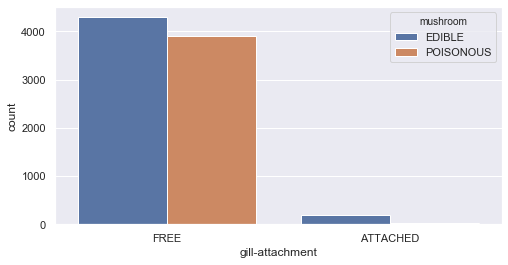

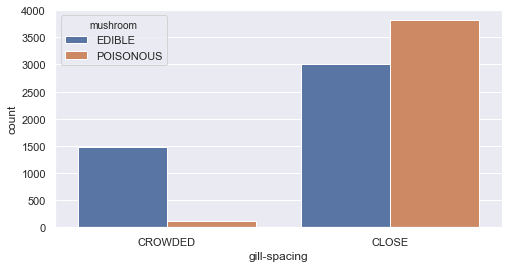

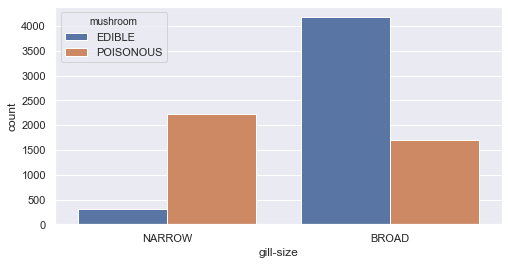

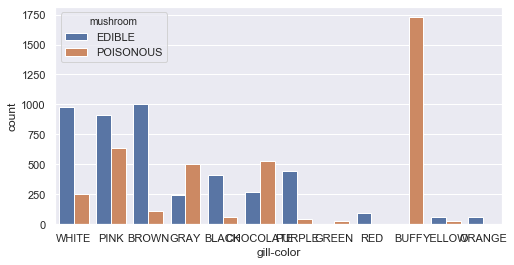

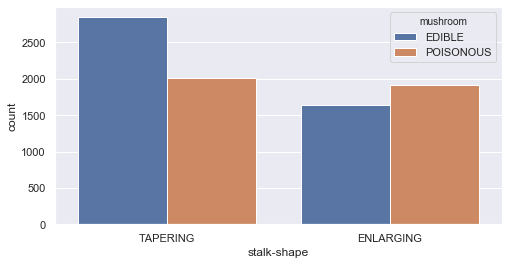

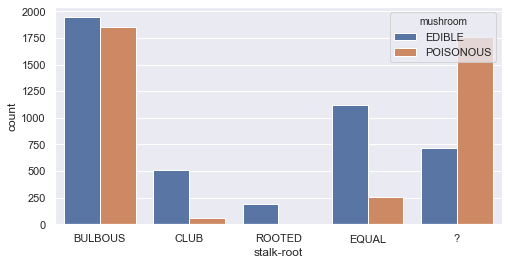

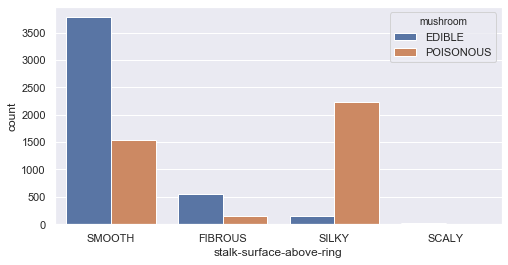

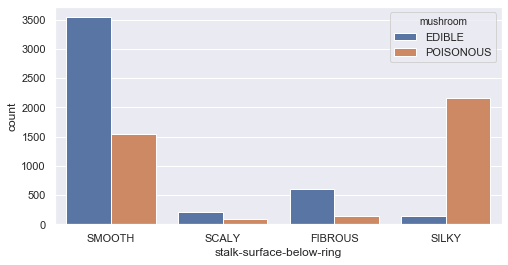

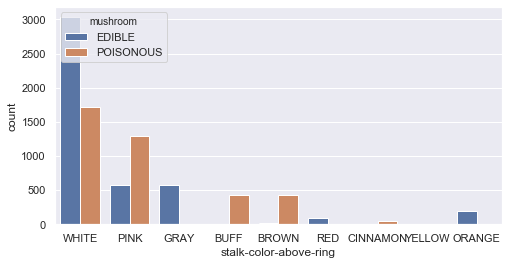

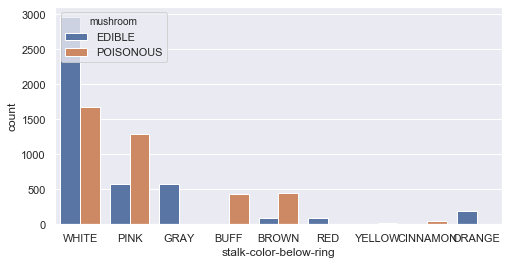

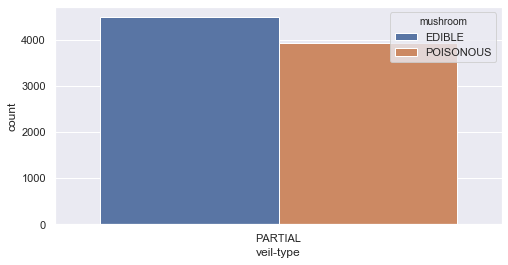

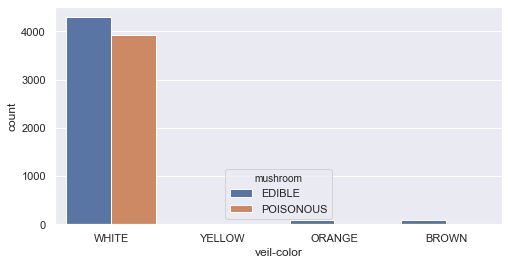

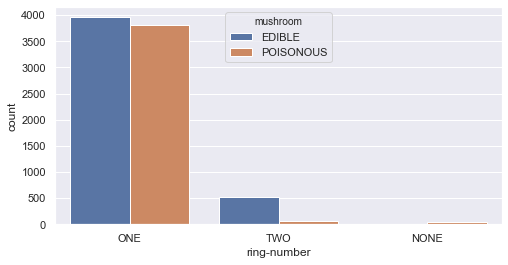

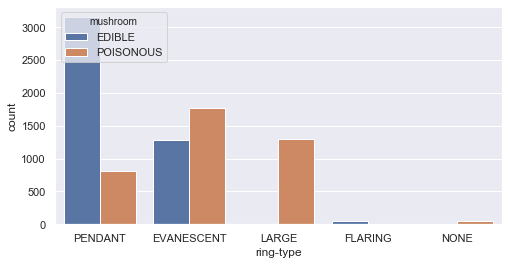

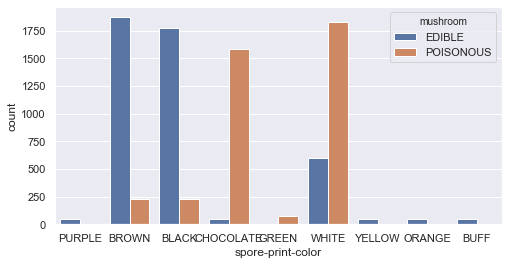

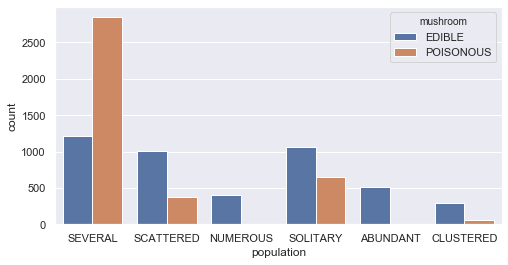

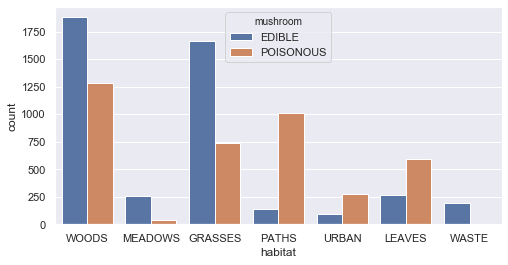

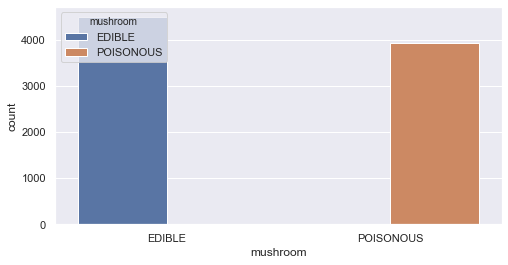

In [7]:
#plot bar graphs for all data
def plot_mushroom(colour, data):
    for i, col in enumerate(mushroom.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(8, 4)})
        ax = sns.countplot(x=mushroom[col], hue=colour, data=data)
        
colour = mushroom['mushroom']
plot_data = mushroom.drop('mushroom', 1)

plot_mushroom(colour, plot_data)

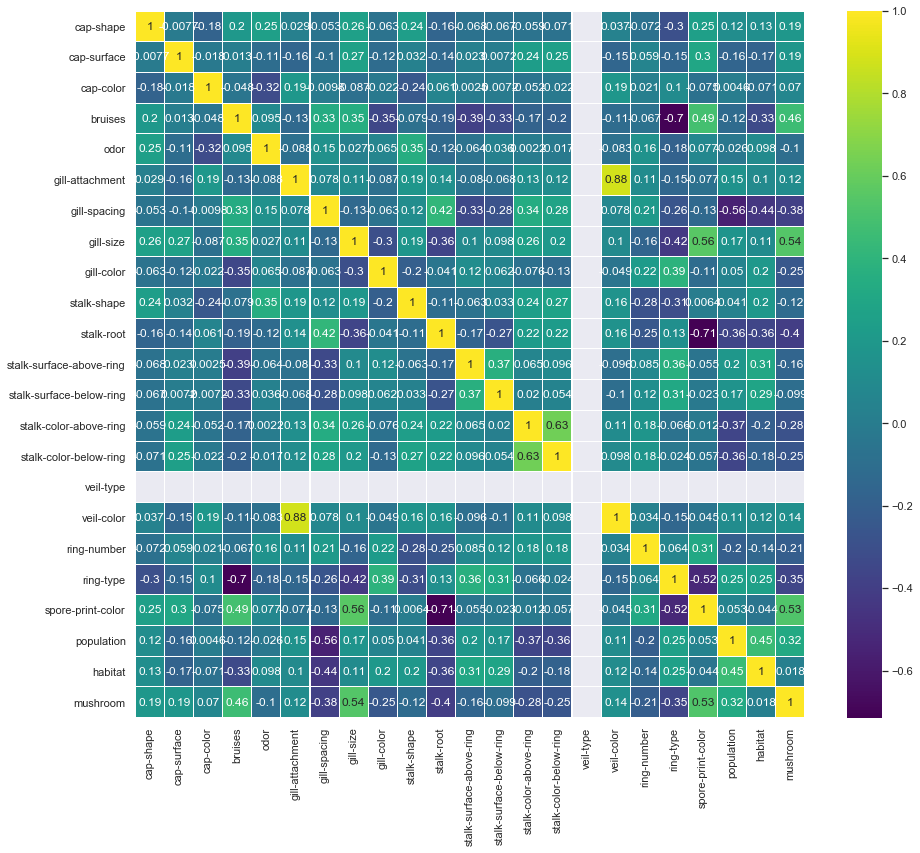

In [8]:
from sklearn.preprocessing import LabelEncoder
import copy

labelEncoder = LabelEncoder()
mushroom_corrplt = copy.deepcopy(mushroom)

for col in mushroom_corrplt.columns:
    mushroom_corrplt[col] = labelEncoder.fit_transform(mushroom_corrplt[col])

plt.figure(figsize=(15,13))
sns.heatmap(mushroom_corrplt.corr(),linewidths=.05,cmap="viridis", annot=True)

## --------------------------------------------------------------------------------------------------------------------------------
## SECTION 2 Data Preparation
In this stage, missing values are handled by dropping the rows with nulls, we will drop the unnecessary features, encode our data and spit our training and test sets.

In [9]:
#We realize that there are actually missing values, which are "?"
#Replace "?" with NaN, then show sum of null values
mushroom = mushroom.replace({'?':np.NaN})
print(mushroom.isna().sum())

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
mushroom                       0
dtype: int64


In [11]:
#Handling missing values: remove rows
mushroom = mushroom.dropna(mushroom, axis="0")


#print summary of results
print('stalk-root categories:\n')
print(mushroom['stalk-root'].value_counts())
print('\nNull values in the dataset:\n')
print(mushroom.isna().sum())

TypeError: dropna() got multiple values for argument 'axis'

In [11]:
#Drop the "veil-type" column, which all hold same value for all rows
mushroom.drop('veil-type', axis=1, inplace=True)

print('Shape of dataset:', mushroom.shape)

Shape of dataset: (5936, 22)


C:\Users\Alisa\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


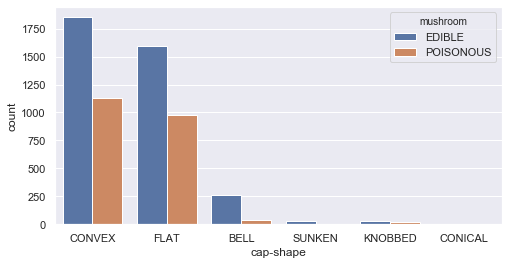

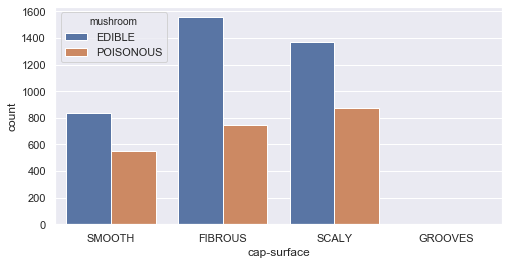

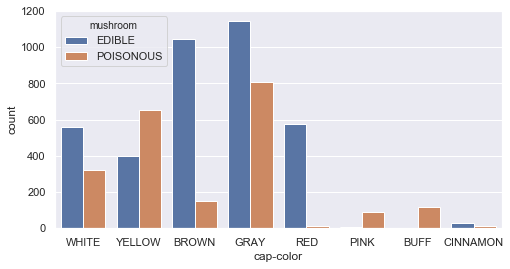

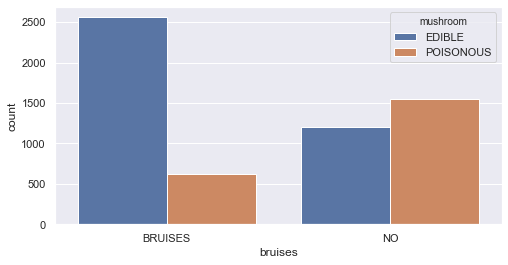

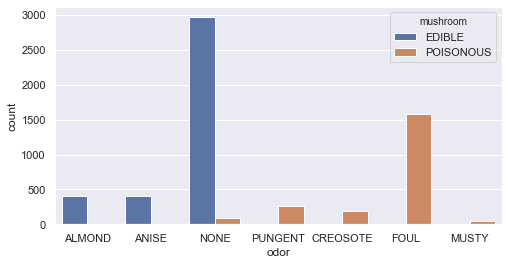

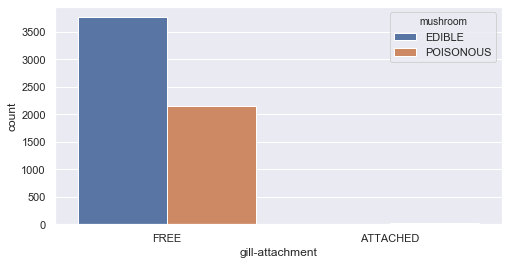

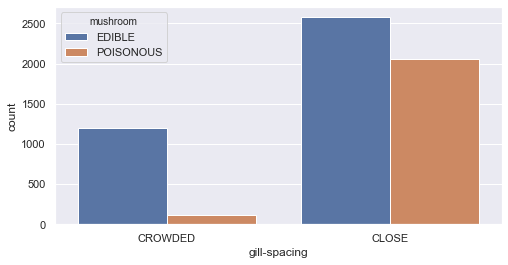

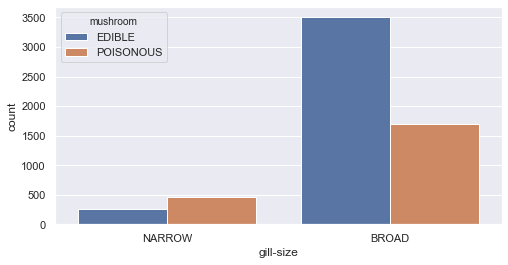

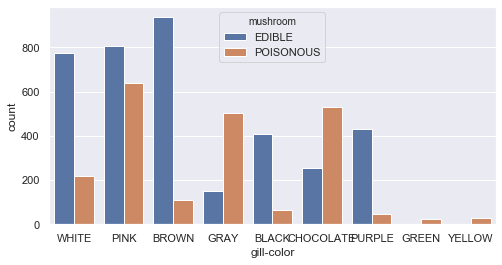

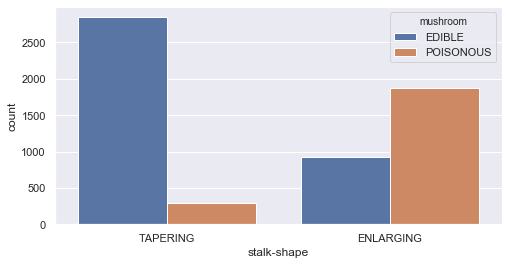

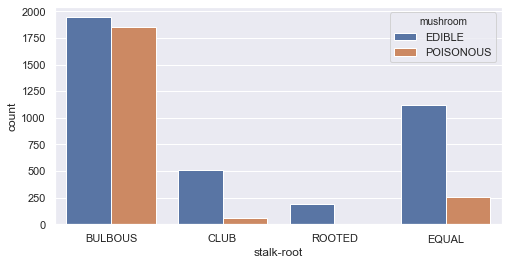

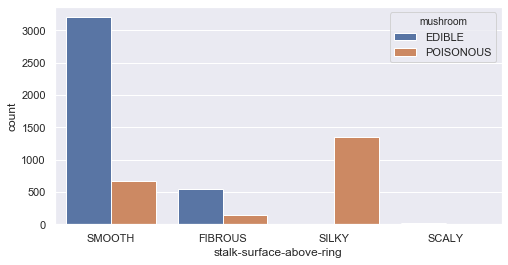

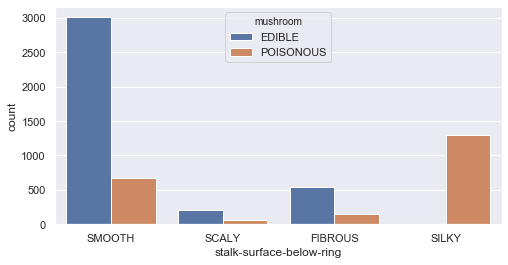

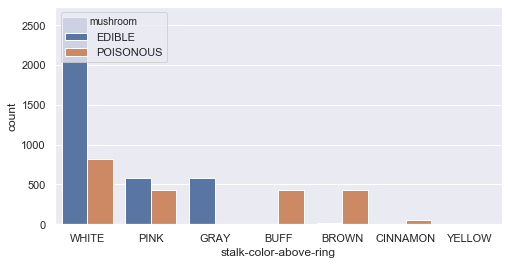

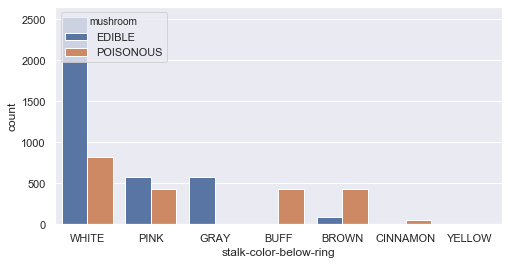

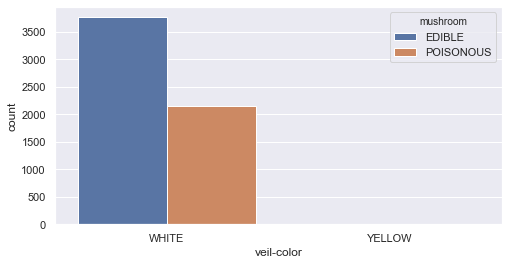

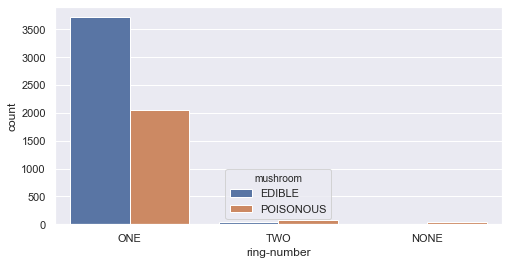

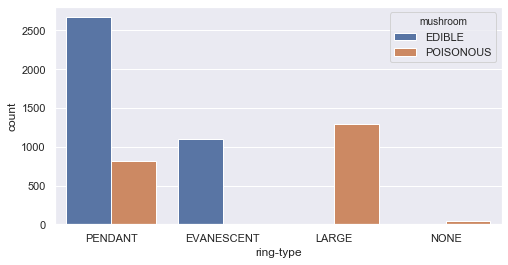

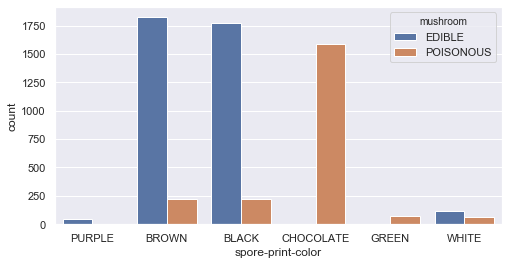

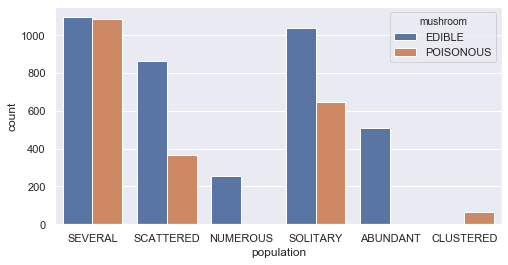

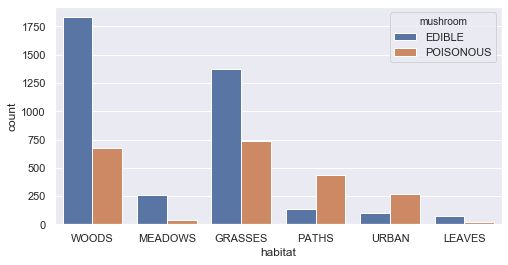

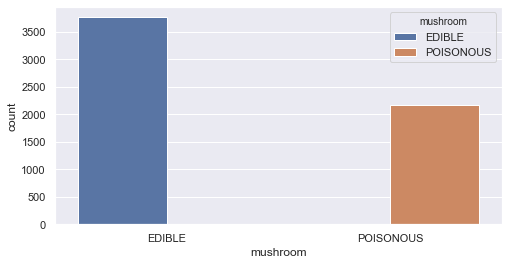

In [12]:
colour = mushroom['mushroom']
plot_data = mushroom.drop('mushroom', 1)

plot_mushroom(colour, plot_data)

In [13]:
#label encoding
lbl_en = LabelEncoder()
mushroom['mushroom'] = lbl_en.fit_transform(mushroom['mushroom'])

#one-hot encoding
mushroom = pd.get_dummies(mushroom)

print('Shape of dataset:', mushroom.shape)

Shape of dataset: (5936, 98)


In [14]:
#splitting input matrix X and output vector y
X = mushroom.drop('mushroom', axis=1)
y = mushroom['mushroom']

print('Shape of original dataset:', mushroom.shape)
print('X: shape=', X.shape, 'type=', type(X))
print('y: shape=', y.shape, 'type=', type(y))

Shape of original dataset: (5936, 98)
X: shape= (5936, 97) type= <class 'pandas.core.frame.DataFrame'>
y: shape= (5936,) type= <class 'pandas.core.series.Series'>


In [15]:
#splitting test and training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=33)
print('full set shape =', X.shape)
print('\nX train shape =', X_train.shape)
print('y train shape =', y_train.shape)
print('X test shape =', X_test.shape)
print('y test shape =', y_test.shape)

full set shape = (5936, 97)

X train shape = (4748, 97)
y train shape = (4748,)
X test shape = (1188, 97)
y test shape = (1188,)


## --------------------------------------------------------------------------------------------------------------------------------
## SECTION 3 Model Training and Validation

In [16]:
### define functions for model training and testing ###

#import libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import time


#----------- to display results ------------#
def show_results(model, name, y_pred):
    print('    Classification Results for', name)
    print('========================================================')

    #print classifiction report
    print('Classification Report:\n')
    print(classification_report(y_test, y_pred, target_names=['0-Poisonous', '1-Edible']))
    print()
    print("Accuracy of", name, "on training set: {:0.8f}" .format(model.score(X_train, y_train)))
    print("Accuracy of", name, "on test set: {:0.8f}" .format(model.score(X_test, y_test)))
    print()
    
    #plot the confusion matrix
    conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                            columns=['Predicted Poison', 'Predicted Edible'], 
                            index=['Actual Poison', 'Actual Edible'])
    print('Confusion Matrix:\n', conf_mat)


    
#-------- to plot Precision-Recall ---------#
def plot_pre_rec(pre, rec, name):
    plt.figure(figsize=(6,4))
    title = 'PR Graph for ' + name
    plt.title(title)
    plt.plot(rec, pre, 'b-', label='PR curve')
    plt.legend(loc='lower right')
    plt.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    
    

#--------------- to plot ROC ---------------#
def plot_roc(fpr, tpr, name):
    plt.figure(figsize=(6,4))
    title = 'ROC Curve for ' + name
    plt.title(title)
    plt.plot(fpr, tpr, color='red', label='ROC curve')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'k--')
    plt.axis('tight')
    plt.xlabel('False Prositive Rate')
    plt.ylabel('True Positive Rate')


    
#------- function for model training -------#
#store results for comparison
comparison_table = []
model_names = []
model_accuracies = []
model_precisions = []
model_recalls=[]
model_f1s = []
model_times = []

def test_model(model, name):
    #train model, keep track of time
    start_time = time.time()
    end_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - end_time
    total_time =  (end_time - start_time) + predict_time
    
    #print results
    show_results(model, name, y_pred)
    
    #plot ROC
    auc_roc = metrics.roc_auc_score(y_test, y_pred)
    print('\nArea Under Curve: {:0.8f}'.format(auc_roc))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc = auc(fpr, tpr)
    plot_roc(fpr, tpr, name)
    
    #plot PR
    y_scores_cv = cross_val_predict(logistic_reg, X_test, y_test, cv=5) 
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_cv)
    plot_pre_rec(precisions, recalls, name)
    
    #append model training details
    model_names.append(name)
    model_accuracies.append(accuracy_score(y_test, y_pred))
    model_precisions.append(precision_score(y_test,y_pred))
    model_recalls.append(recall_score(y_test,y_pred))
    model_f1s.append(f1_score(y_test,y_pred))
    model_times.append(total_time)
    

In [17]:
### define functions for model hyperparameter tuning and testing ###

#import libraries
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV


#----------- to display results ------------#
def show_kfold(model):
    print('     K-Fold Results    ')
    print('=======================')

    #K-fold cross validation
    k_scores = cross_val_score(model, X_test, y_test, cv=5, scoring='accuracy')
    print('5-Fold Cross-Validation: ', k_scores)
    print('Cross-Validation Mean: {:0.8f}'.format(k_scores.mean()))
    

    
#------- function for model tuning -------#
#store results for comparison
comparison_tune = []
tune_names = []
tune_accuracies = []
tune_precisions = []
tune_recalls=[]
tune_f1s = []
tune_times = []

def test_tuned_model(model, name, y_pred):
    #train tuned model, keep track of time
    start_time = time.time()
    end_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - end_time
    total_time =  (end_time - start_time) + predict_time
    
    #print results
    show_results(model, name, y_pred)
    
    #show k-fold
    print()
    show_kfold(model)
    
    #append model tuning details
    tune_names.append(name)
    tune_accuracies.append(accuracy_score(y_test, y_pred))
    tune_precisions.append(precision_score(y_test,y_pred))
    tune_recalls.append(recall_score(y_test,y_pred))
    tune_f1s.append(f1_score(y_test,y_pred))
    tune_times.append(total_time)
    

-------------------------------------------------------------------------------------------------------------------------------
### 1. Logistic regression
#### Logistic Regression: Model Training

In [18]:
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Logistic Prgression: Tuning and Testing

    Classification Results for Logistic Regression
Classification Report:

              precision    recall  f1-score   support

 0-Poisonous       1.00      1.00      1.00       754
    1-Edible       1.00      1.00      1.00       434

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188


Accuracy of Logistic Regression on training set: 1.00000000
Accuracy of Logistic Regression on test set: 1.00000000

Confusion Matrix:
                Predicted Poison  Predicted Edible
Actual Poison               754                 0
Actual Edible                 0               434

Area Under Curve: 1.00000000


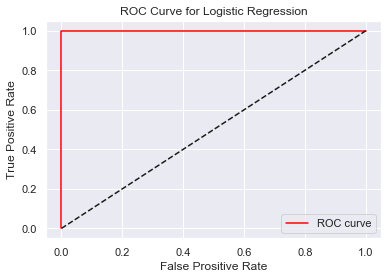

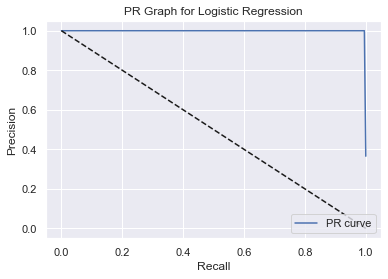

In [19]:
#test & result
test_model(logistic_reg, "Logistic Regression")

<b>Logistic Regression: K-Fold</b>

In [20]:
#show k-fold results
show_kfold(logistic_reg)

     K-Fold Results    
5-Fold Cross-Validation:  [1.         1.         0.99579832 0.99578059 1.        ]
Cross-Validation Mean: 0.99831578


<b>Logistic Regression: Grid Search</b>

In [21]:
#perform grid search
logreg_grid_params = [{'C': np.logspace(-3, 1, 3, 5, 10)}]
logreg_grid_search = GridSearchCV(logistic_reg, param_grid=logreg_grid_params, verbose=1, cv=5, scoring = 'accuracy')
logreg_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.e-03, 1.e-01, 1.e+01])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [22]:
#best parameter evaluated
logreg_grid_search.best_params_

{'C': 10.0}

In [23]:
#return the best estimator
final_logreg = logreg_grid_search.best_estimator_
final_logreg.fit(X_train, y_train)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
#final logistic regression model
y_pred_lg_gs = final_logreg.predict(X_test)
test_tuned_model(final_logreg, "Tuned Logistic Regression", y_pred_lg_gs)

    Classification Results for Tuned Logistic Regression
Classification Report:

              precision    recall  f1-score   support

 0-Poisonous       1.00      1.00      1.00       754
    1-Edible       1.00      1.00      1.00       434

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188


Accuracy of Tuned Logistic Regression on training set: 1.00000000
Accuracy of Tuned Logistic Regression on test set: 1.00000000

Confusion Matrix:
                Predicted Poison  Predicted Edible
Actual Poison               754                 0
Actual Edible                 0               434

     K-Fold Results    
5-Fold Cross-Validation:  [1.         1.         0.99579832 0.99578059 1.        ]
Cross-Validation Mean: 0.99831578


Cross-Validation mean of 0.99831578 did not have any changes even after tuning, we intepret this that the results from the initial test are good enough to not cause overfitting.

In [25]:
#Most influential features which determine that a mushroom is poisonous
inf_features = pd.DataFrame(final_logreg.coef_, index=['parameter value'])
inf_features.columns = X.columns
inf_features.sort_values('parameter value', axis=1, ascending=False).T.head()

,parameter value
odor_PUNGENT,4.210410
odor_CREOSOTE,3.740262
spore-print-color_GREEN,3.557892
spore-print-color_CHOCOLATE,3.353191
odor_FOUL,3.353191


In [26]:
#Most influential features which determine that a mushroom is edible
inf_features.sort_values('parameter value', axis=1, ascending=True).T.head()

,parameter value
odor_NONE,-4.128599
odor_ALMOND,-3.923914
odor_ANISE,-3.885368
stalk-color-below-ring_BROWN,-2.076236
stalk-shape_TAPERING,-2.005920


-------------------------------------------------------------------------------------------------------------------------------
### 2. Naive Bayes
#### Naive Bayes: Model Training

In [27]:
from sklearn.naive_bayes import GaussianNB as NB

naive_bay = NB()
naive_bay.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Naive Bayes: Tuning and Testing

    Classification Results for Naive Bayes
Classification Report:

              precision    recall  f1-score   support

 0-Poisonous       1.00      1.00      1.00       754
    1-Edible       1.00      1.00      1.00       434

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188


Accuracy of Naive Bayes on training set: 0.99852570
Accuracy of Naive Bayes on test set: 0.99915825

Confusion Matrix:
                Predicted Poison  Predicted Edible
Actual Poison               753                 1
Actual Edible                 0               434

Area Under Curve: 0.99933687


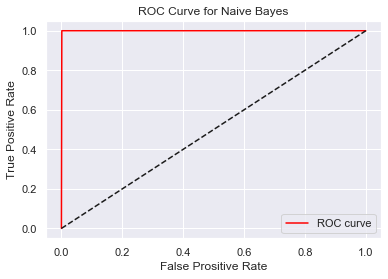

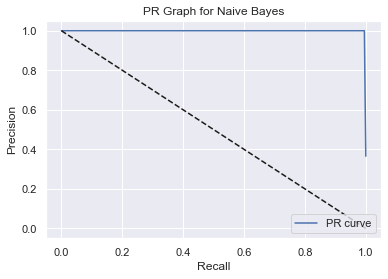

In [28]:
#test & result
test_model(naive_bay, "Naive Bayes")

<b>Naive Bayes: K-Fold</b>

In [29]:
#show k-fold results
show_kfold(naive_bay)

     K-Fold Results    
5-Fold Cross-Validation:  [0.99579832 0.99579832 0.99579832 0.99156118 1.        ]
Cross-Validation Mean: 0.99579123


<b>Naive Bayes: Grid Search</b>

In [30]:
nb_grid_params = [{'var_smoothing': np.logspace(0,-9, num=100)}]
nb_grid_search = GridSearchCV(naive_bay, param_grid=nb_grid_params, verbose=1, cv=5, scoring = 'accuracy')
nb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    5.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid=[{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6....
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [31]:
#best parameter evaluated
nb_grid_search.best_params_

{'var_smoothing': 2.848035868435805e-09}

In [32]:
#return the best estimator
final_nb = nb_grid_search.best_estimator_
final_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=2.848035868435805e-09)

In [33]:
#final Naive Bayes model
y_pred_nb_gs = final_nb.predict(X_test)
test_tuned_model(final_nb, "Tuned Naive Bayes", y_pred_nb_gs)

    Classification Results for Tuned Naive Bayes
Classification Report:

              precision    recall  f1-score   support

 0-Poisonous       1.00      1.00      1.00       754
    1-Edible       1.00      1.00      1.00       434

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188


Accuracy of Tuned Naive Bayes on training set: 0.99852570
Accuracy of Tuned Naive Bayes on test set: 0.99915825

Confusion Matrix:
                Predicted Poison  Predicted Edible
Actual Poison               753                 1
Actual Edible                 0               434

     K-Fold Results    
5-Fold Cross-Validation:  [0.99579832 0.99579832 0.99579832 0.99156118 1.        ]
Cross-Validation Mean: 0.99579123


-------------------------------------------------------------------------------------------------------------------------------
### 3. k-Nearest Neighbour (KNN)
#### KNN: Model Training

In [12]:
from sklearn.neighbors import KNeighborsClassifier as KNeighbours


knn = KNeighbours()
knn.fit(X_train, y_train)

NameError: name 'X_train' is not defined

#### KNN: Tuning and Testing

    Classification Results for K-Nearest Neighbour
Classification Report:

              precision    recall  f1-score   support

 0-Poisonous       1.00      1.00      1.00       754
    1-Edible       1.00      1.00      1.00       434

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188


Accuracy of K-Nearest Neighbour on training set: 1.00000000
Accuracy of K-Nearest Neighbour on test set: 1.00000000

Confusion Matrix:
                Predicted Poison  Predicted Edible
Actual Poison               754                 0
Actual Edible                 0               434

Area Under Curve: 1.00000000


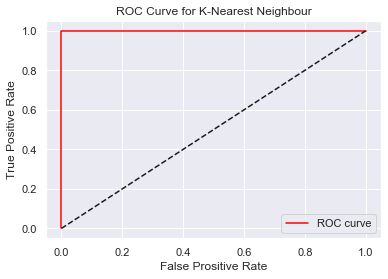

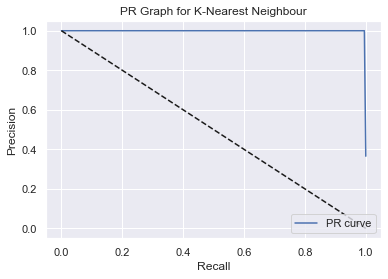

In [35]:
#test & result
test_model(knn, "K-Nearest Neighbour")

<b>KNN: K-Fold</b>

In [36]:
#show k-fold results
show_kfold(knn)

     K-Fold Results    
5-Fold Cross-Validation:  [1.         1.         0.99579832 0.98734177 1.        ]
Cross-Validation Mean: 0.99662802


<b>KNN: Grid Search</b>

In [37]:
#perform grid search
grid_params = {
    "n_neighbors" : [3,5,11,19],
    "leaf_size" : [3,5,7,9],
    "metric" : ["euclidean","manhattan", 'minkowski'],
    "p": [1,2]
}

knn_grid_search = GridSearchCV(KNeighbours(), param_grid=grid_params, verbose=1, cv=5, n_jobs=-1, scoring = 'accuracy')
knn_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [3, 5, 7, 9],
                         'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 11, 19], 'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [38]:
#best parameter evaluated
knn_grid_search.best_params_

{'leaf_size': 3, 'metric': 'euclidean', 'n_neighbors': 3, 'p': 1}

In [39]:
#return the best estimator
final_knn = knn_grid_search.best_estimator_
final_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')

In [40]:
#final knn model
y_pred_knn_gs = final_knn.predict(X_test)
test_tuned_model(final_knn, "Tuned KNN", y_pred_knn_gs)

    Classification Results for Tuned KNN
Classification Report:

              precision    recall  f1-score   support

 0-Poisonous       1.00      1.00      1.00       754
    1-Edible       1.00      1.00      1.00       434

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188


Accuracy of Tuned KNN on training set: 1.00000000
Accuracy of Tuned KNN on test set: 1.00000000

Confusion Matrix:
                Predicted Poison  Predicted Edible
Actual Poison               754                 0
Actual Edible                 0               434

     K-Fold Results    
5-Fold Cross-Validation:  [1.         1.         0.99579832 0.99156118 1.        ]
Cross-Validation Mean: 0.99747190


Cross-Validation Mean was able to have an increase from 0.99662802 to 0.99747190 after tuning.

-------------------------------------------------------------------------------------------------------------------------------
### 4. Decision Tree Classifier
#### Decision Tree Classifier: Model Training

In [41]:
from sklearn.tree import DecisionTreeClassifier as DT

deci_tree = DT(criterion='entropy',random_state=33)
deci_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=33, splitter='best')

#### Decision Tree Classifier: Tuning and Testing

    Classification Results for Decision Tree Classifier
Classification Report:

              precision    recall  f1-score   support

 0-Poisonous       1.00      1.00      1.00       754
    1-Edible       1.00      1.00      1.00       434

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188


Accuracy of Decision Tree Classifier on training set: 1.00000000
Accuracy of Decision Tree Classifier on test set: 1.00000000

Confusion Matrix:
                Predicted Poison  Predicted Edible
Actual Poison               754                 0
Actual Edible                 0               434

Area Under Curve: 1.00000000


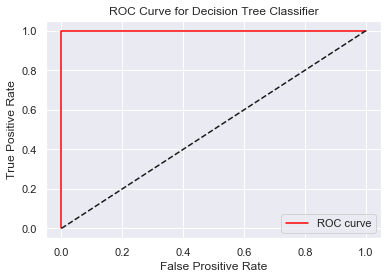

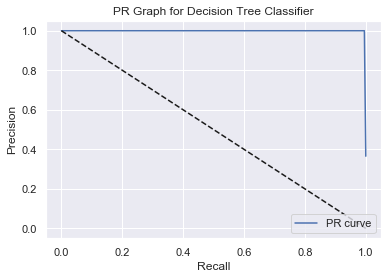

In [42]:
#test & result
test_model(deci_tree, "Decision Tree Classifier")

<b>Decision Tree: K-Fold</b>

In [43]:
#show k-fold results
show_kfold(deci_tree)

     K-Fold Results    
5-Fold Cross-Validation:  [1.         1.         0.99579832 0.99578059 1.        ]
Cross-Validation Mean: 0.99831578


<b>Decision Tree: Grid Search</b>

In [44]:
#Find out the best parameters
grid_params = {'criterion': ['gini', 'entropy'],
                'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                'min_samples_split': [2, 4, 6, 8, 10]}

dt_grid_search = GridSearchCV(estimator=deci_tree, param_grid=grid_params, cv=5, verbose=1, scoring='accuracy')
dt_grid_search.fit(X_test, y_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=33,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [45]:
#best parameter evaluated
dt_grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}

In [46]:
#return the best estimator
final_decitree = dt_grid_search.best_estimator_
final_decitree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=33, splitter='best')

In [47]:
y_pred_dt_gs = final_decitree.predict(X_test)
test_tuned_model(final_decitree, "Tuned Decision Tree", y_pred_dt_gs)

    Classification Results for Tuned Decision Tree
Classification Report:

              precision    recall  f1-score   support

 0-Poisonous       1.00      1.00      1.00       754
    1-Edible       1.00      1.00      1.00       434

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188


Accuracy of Tuned Decision Tree on training set: 1.00000000
Accuracy of Tuned Decision Tree on test set: 1.00000000

Confusion Matrix:
                Predicted Poison  Predicted Edible
Actual Poison               754                 0
Actual Edible                 0               434

     K-Fold Results    
5-Fold Cross-Validation:  [1.         1.         0.99579832 0.99578059 1.        ]
Cross-Validation Mean: 0.99831578


After tuning, the cross-validation mean remained as 0.99831578.

In [53]:
feature_importances = dt_grid_search.best_estimator_.feature_importances_
attributes = X_train.columns.tolist()
sorted(zip(feature_importances, attributes), reverse=True)

[(0.5583747962848332, 'odor_FOUL'),
 (0.18663936238720658, 'gill-size_BROAD'),
 (0.10676340761915219, 'ring-number_ONE'),
 (0.06071614830027837, 'stalk-shape_TAPERING'),
 (0.04510491400535522, 'odor_NONE'),
 (0.018447032516446246, 'habitat_PATHS'),
 (0.014929988818107729, 'population_CLUSTERED'),
 (0.009024350068620486, 'stalk-color-above-ring_BROWN'),
 (0.0, 'veil-color_YELLOW'),
 (0.0, 'veil-color_WHITE'),
 (0.0, 'stalk-surface-below-ring_SMOOTH'),
 (0.0, 'stalk-surface-below-ring_SILKY'),
 (0.0, 'stalk-surface-below-ring_SCALY'),
 (0.0, 'stalk-surface-below-ring_FIBROUS'),
 (0.0, 'stalk-surface-above-ring_SMOOTH'),
 (0.0, 'stalk-surface-above-ring_SILKY'),
 (0.0, 'stalk-surface-above-ring_SCALY'),
 (0.0, 'stalk-surface-above-ring_FIBROUS'),
 (0.0, 'stalk-shape_ENLARGING'),
 (0.0, 'stalk-root_ROOTED'),
 (0.0, 'stalk-root_EQUAL'),
 (0.0, 'stalk-root_CLUB'),
 (0.0, 'stalk-root_BULBOUS'),
 (0.0, 'stalk-color-below-ring_YELLOW'),
 (0.0, 'stalk-color-below-ring_WHITE'),
 (0.0, 'stalk-colo

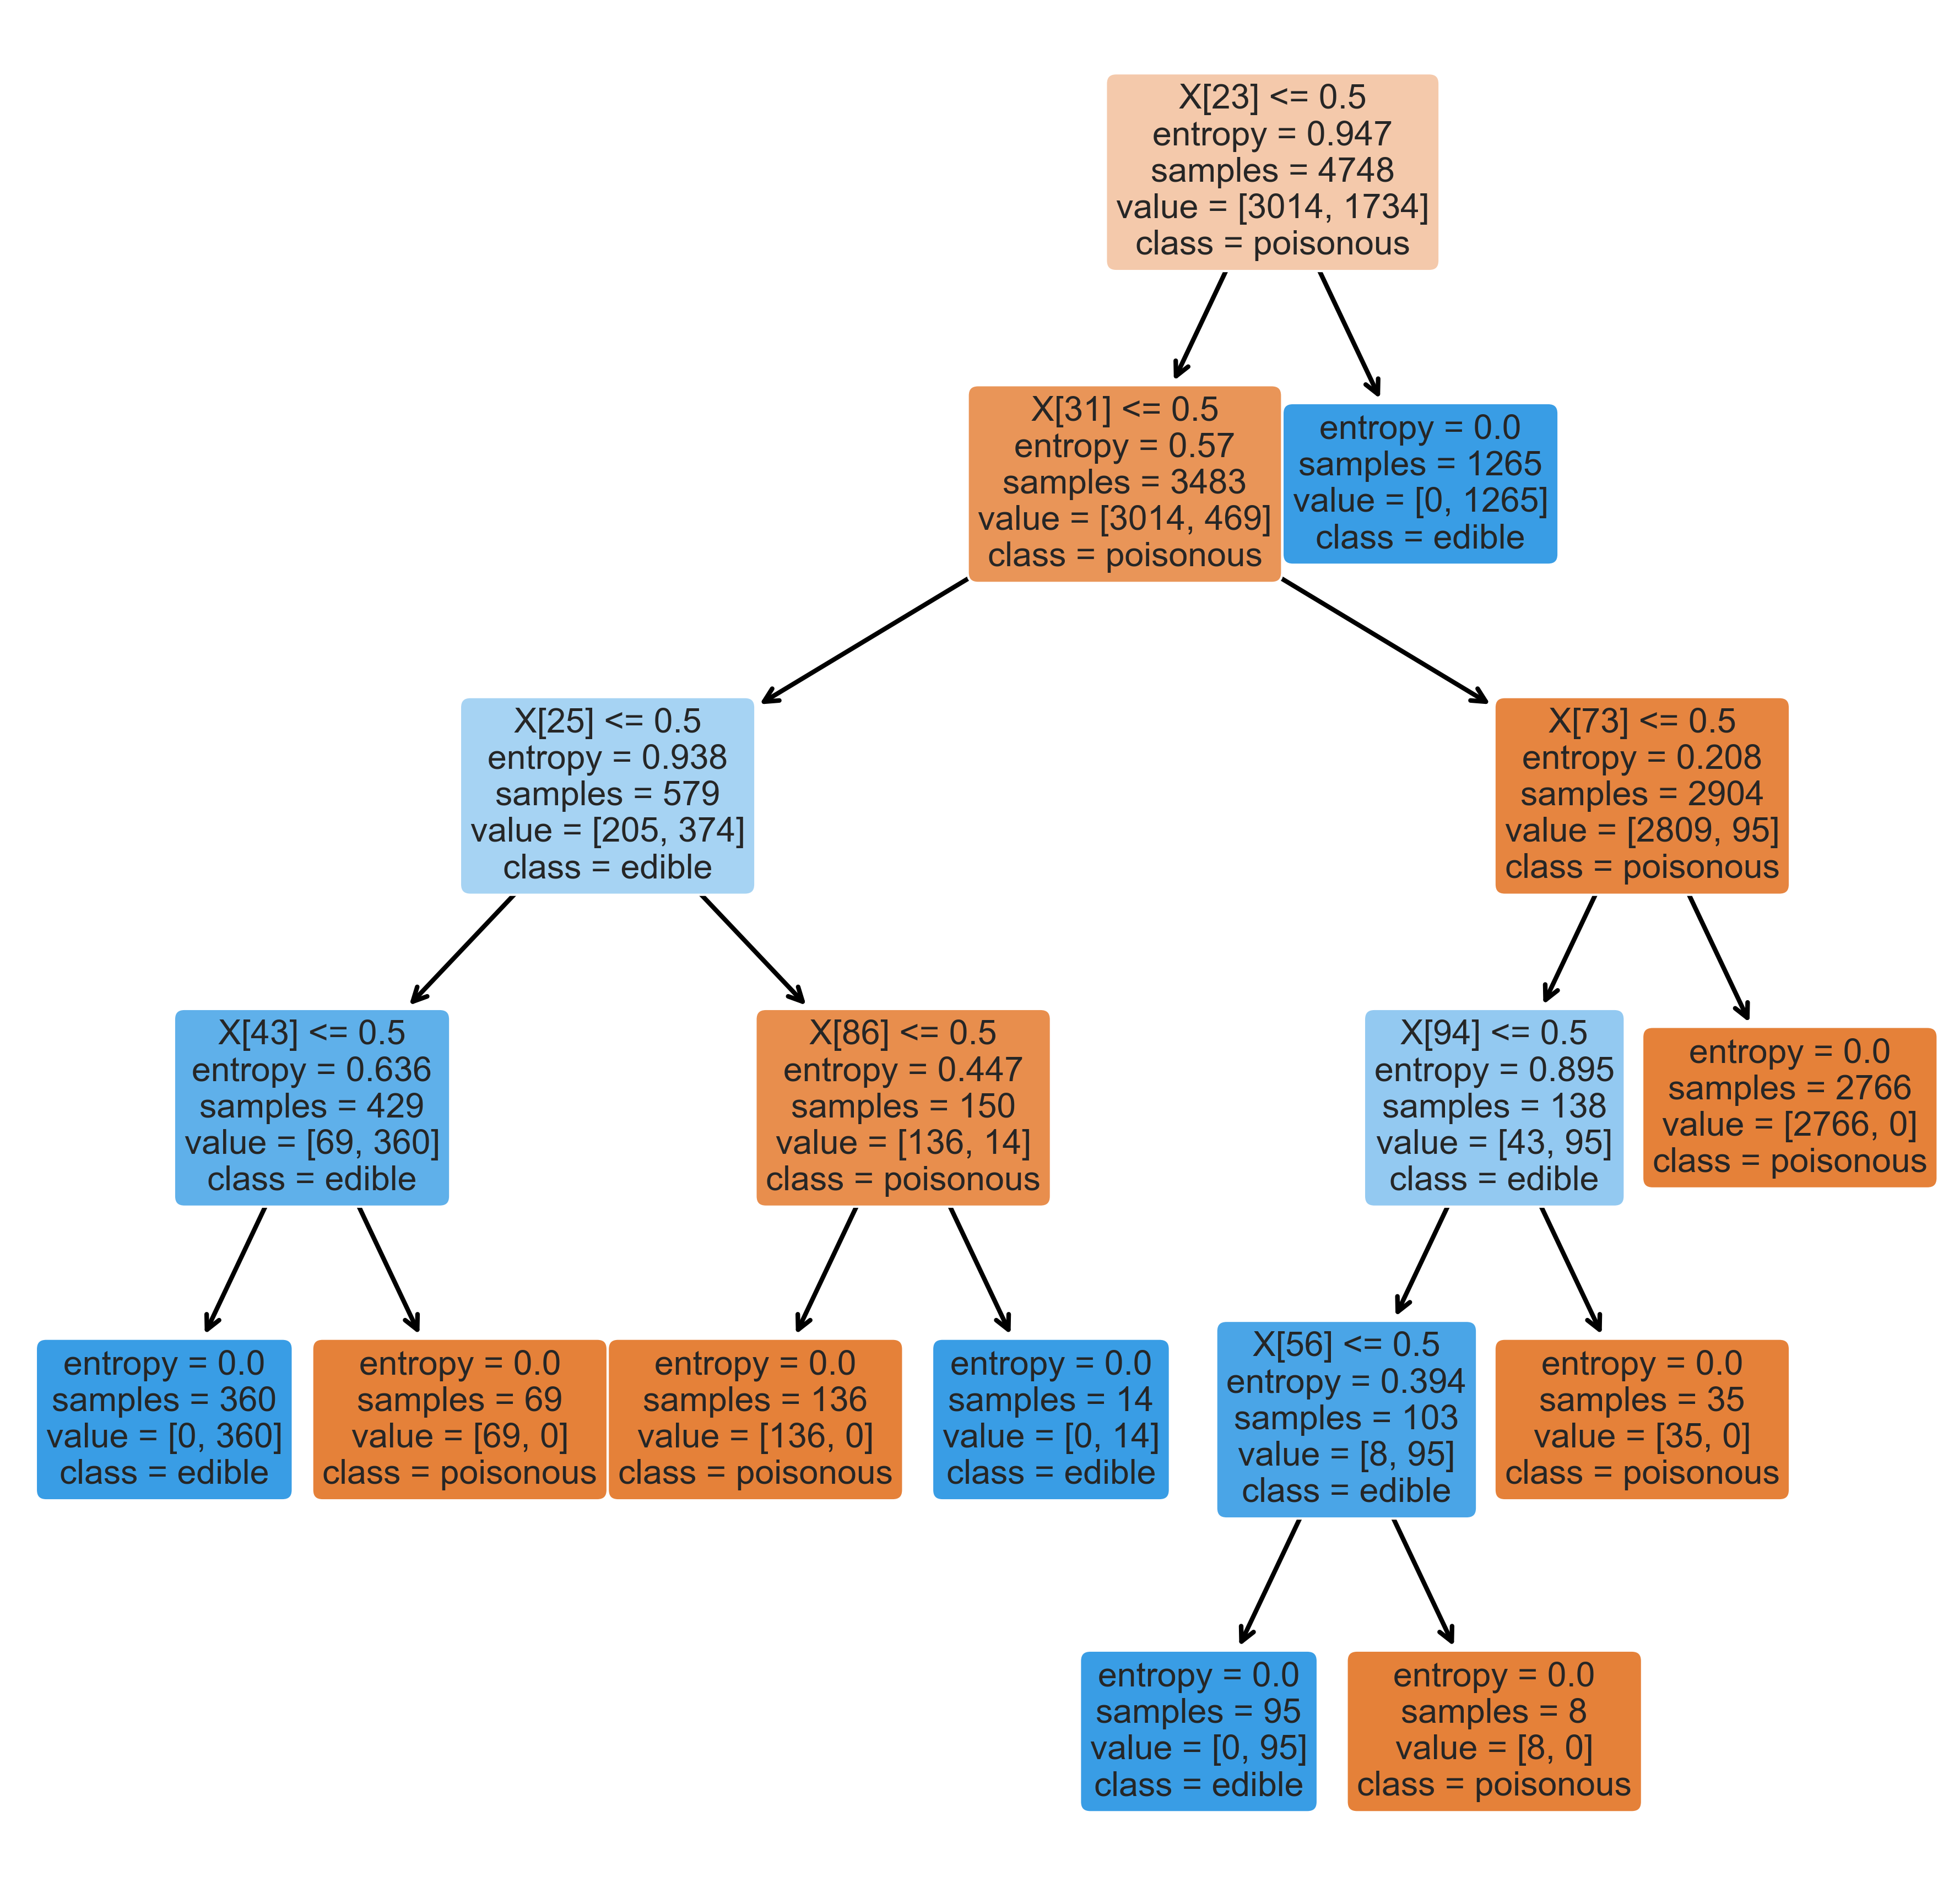

In [54]:
#visualize the most influential features which determine the mushroom
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15), dpi=300)
out = plot_tree(final_decitree, filled=True, rounded=True, fontsize=15, class_names=['poisonous','edible'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

## --------------------------------------------------------------------------------------------------------------------------------
## SECTION 4 Performance Analysis
### Dimension reducing to plot data
<b>1. Principal Component Analysis (PCA)</b>

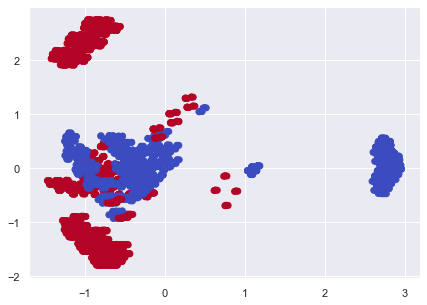

In [49]:
#perform Principal Component Analysis(PCA), reduce number of dimensions
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm

#perform PCA
pca = PCA(n_components=2, random_state=33)
X_pca_plot = pca.fit_transform(X)

#Plot the graph
plt.figure(figsize=(7,5))
plt.scatter(X_pca_plot[:,0], X_pca_plot[:,1], c=mushroom['mushroom'], cmap=cm.coolwarm_r)
plt.show()

<b>2. t-Distributed Stochastic Neighbour Embedding (t-SNE)</b>

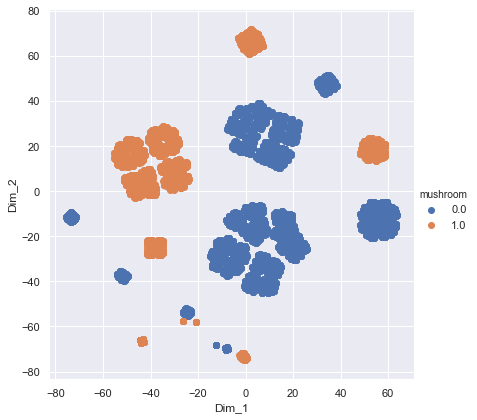

In [50]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=33)
X_tsne_plot = tsne.fit_transform(X) 

#Create the dataframe to plot
X_tsne_data = np.vstack((X_tsne_plot.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim_1', 'Dim_2', 'mushroom'])

#Plot the graph
sns.FacetGrid(df_tsne, hue='mushroom', height=6)\
.map(plt.scatter, 'Dim_1', 'Dim_2')\
.add_legend();

## --------------------------------------------------------------------------------------------------------------------------------
## SECTION 5 Model Comparison
<b>Comparison Table of all models' performance</b>

In [51]:
#print out comparison table (before tuning)
model_compare = pd.DataFrame({'Model':model_names, 
                              'Accuracy Score':model_accuracies,
                              'Precision':model_precisions,
                              'Recall':model_recalls,
                              'F1 Score':model_f1s,
                              'Time':model_times})

comparison_table.append(model_compare)
model_compare

,Model,Accuracy Score,Precision,Recall,F1 Score,Time
0,Logistic Regression,1.000000,1.000000,1.0,1.000000,0.001998
1,Naive Bayes,0.999158,0.997701,1.0,0.998849,0.003998
2,K-Nearest Neighbour,1.000000,1.000000,1.0,1.000000,0.750300
3,Decision Tree Classifier,1.000000,1.000000,1.0,1.000000,0.003000


In [52]:
#print out comparison table (after tuning)
tune_compare = pd.DataFrame({'Model':tune_names, 
                              'Accuracy Score':tune_accuracies,
                              'Precision':tune_precisions,
                              'Recall':tune_recalls,
                              'F1 Score':tune_f1s,
                              'Time':tune_times})

comparison_tune.append(tune_compare)
tune_compare

,Model,Accuracy Score,Precision,Recall,F1 Score,Time
0,Tuned Logistic Regression,1.000000,1.000000,1.0,1.000000,0.001999
1,Tuned Naive Bayes,0.999158,0.997701,1.0,0.998849,0.004995
2,Tuned KNN,1.000000,1.000000,1.0,1.000000,1.624485
3,Tuned Decision Tree,1.000000,1.000000,1.0,1.000000,0.001998
